In [8]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!mamba install html.parser==1.1 -y
!pip install nbformat==4.2.0
!!pip install lxml==4.6.4

import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/r/linux-64          [>                   ] (--:--) No change
pkgs/r/linux-64 

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Question 1: Use yfinance to Extract Stock Data

In [4]:
import yfinance as yf
import pandas as pd

In [5]:
Tesla = yf.Ticker("TSLA")

In [6]:
Tesla_data = Tesla.history(period="max")

In [7]:
Tesla_data.reset_index(inplace=True)

In [11]:
Tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [9]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
url="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

In [10]:
html_data=requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

In [11]:
tables = soup.find_all('table')
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in tables:
    if table.find('th').getText().startswith('Tesla Quarterly Revenue'):
        for row in table.find('tbody').find_all('tr'):
            col = row.find_all('td')
            Date = col[0].text
            Revenue = col[1].string
            tesla_revenue = tesla_revenue.append({'Date':Date,'Revenue': Revenue}, ignore_index=True)
            tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '').str.replace(',', '')

In [12]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]


In [31]:
tesla_revenue.tail()

,Date,Revenue
50,2010-06-30,28
51,2010-03-31,21
52,2009-12-31,None
53,2009-09-30,46
54,2009-06-30,27


# Question 3: Use yfinance to Extract Stock Data


In [18]:
GameStop = yf.Ticker("GME")

In [19]:
gme_data = GameStop.history(period="max")

In [20]:
gme_data.reset_index(inplace=True)

In [21]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [5]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

html_data  = requests.get(url).text     
soup = BeautifulSoup(html_data, 'html.parser')


tables = soup.find_all('table')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in tables:
    if table.find('th').getText().startswith('GameStop Quarterly Revenue'):
        for row in table.find('tbody').find_all('tr'):
            col = row.find_all('td')
            Date = col[0].text
            Revenue = col[1].string
            gme_revenue = gme_revenue.append({'Date':Date,'Revenue': Revenue}, ignore_index=True)
            gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
            

gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue
52,2010-01-31,3524
53,2009-10-31,1835
54,2009-07-31,1739
55,2009-04-30,1981
56,2009-01-31,3492


# Question 5:Plot Tesla Stock Graph

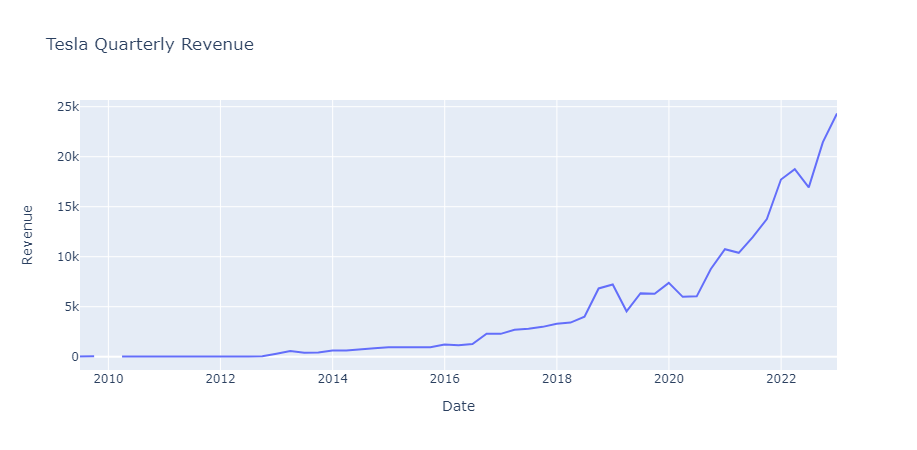

In [22]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.express as px

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')
revenue_table = soup.find_all('table')[1]

revenue_data = pd.read_html(str(revenue_table))[0]
revenue_data.columns = ["Date", "Revenue"]
revenue_data["Revenue"] = revenue_data["Revenue"].str.replace("$", "").str.replace(",", "")

revenue_data["Date"] = pd.to_datetime(revenue_data["Date"])
revenue_data["Revenue"] = pd.to_numeric(revenue_data["Revenue"])

fig = px.line(revenue_data, x="Date", y="Revenue", title="Tesla Quarterly Revenue")
fig.show()


# Question 6: Plot GameStop Stock Graph

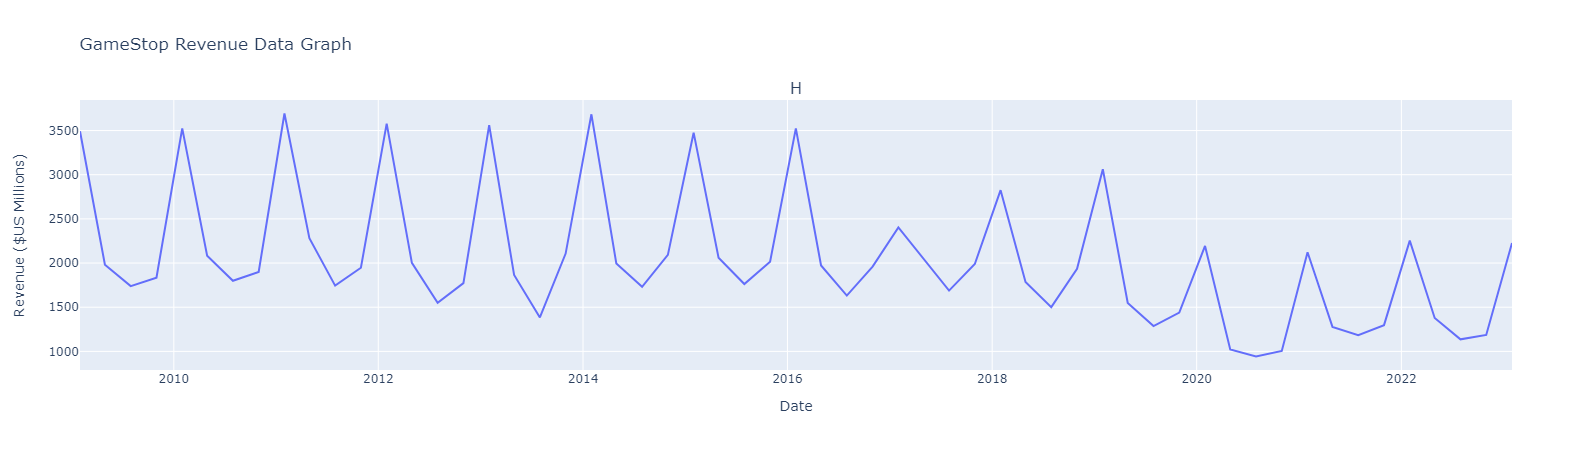

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')

tables = soup.find_all('table')
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in tables:
    if table.find('th').getText().startswith('GameStop Quarterly Revenue'):
        for row in table.find('tbody').find_all('tr'):
            col = row.find_all('td')
            Date = col[0].text
            Revenue = col[1].string
            gme_revenue = gme_revenue.append({'Date':Date,'Revenue': Revenue}, ignore_index=True)
            gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
gme_revenue.dropna(inplace=True)

fig = make_subplots(rows=1, cols=1, subplot_titles=("Historical Revenue"))
fig.add_trace(go.Scatter(x=pd.to_datetime(gme_revenue.Date, infer_datetime_format=True), y=gme_revenue.Revenue.astype("float"), name="Revenue"), row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Revenue ($US Millions)", row=1, col=1)
fig.update_layout(showlegend=False, title="GameStop Revenue Data Graph")
fig.show()
